In [1]:
from MFEA_lib.model import SMP_MFEA
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Funcs import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark


#### Benchmark

In [2]:
# complex
ls_benchmark = []
ls_IndClass = []
name_benchmark = []
path = './RESULTS/result/WCCI22_complex/SMP_v2/'

for i in range(1, 11, 1):
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)


In [2]:
# cec17
t, ic = CEC17_benchmark.get_10tasks_benchmark()

ls_benchmark = [t]
ls_IndClass = [ic]
name_benchmark = ["cec17"]
path = './RESULTS/result/CEC17/SMP_v2/'

In [2]:
# gecco20
ls_benchmark = []
ls_IndClass = []
name_benchmark = []
path = './RESULTS/result/GECCO20/SMP_v2/'

for i in range(1, 11, 1):
    t, ic = WCCI22_benchmark.get_50tasks_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)

pm, lr, prob_search, N_min, len_mem, SHADE/L_SHADE

In [3]:
smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SMP_MFEA
)

smpModel.compile(
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    # mutation = GaussMutation(scale= 0.1),
    # mutation = Directional_Mutation(),
    # mutation = Directional_Mutation_v2(pm = 1/25),
    mutation = Polynomial_Mutation(nm = 7, pm= 1),
    selection= ElitismSelection(random_percent= 0.),
    search= L_SHADE(len_mem= 6),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0., prob_search = 0.4,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,
    save_path= path
)


Time: 22m 13.71s  100 % [====================>]  Pop_size: 1.45E+03  ,  Cost: 2.07E-27  2.44E-27  2.46E-27  2.04E-27  1.54E-27  2.60E-27  2.26E-27  1.59E-27  2.25E-27  1.84E-27  2.05E-27  2.26E-27  1.64E-27  2.54E-27  2.43E-27  2.37E-27  1.32E-27  1.55E-27  2.39E-27  1.76E-27  2.08E-27  2.41E-27  2.04E-27  1.34E-27  2.94E-27  1.79E-27  1.76E-27  2.90E-27  2.03E-27  2.71E-27  1.46E-27  3.00E-27  2.88E-27  1.64E-27  1.72E-27  1.74E-27  2.18E-27  1.80E-27  1.88E-27  2.50E-27  1.94E-27  1.51E-27  2.10E-27  2.04E-27  1.67E-27  2.45E-27  2.86E-27  2.14E-27  1.61E-27  2.16E-27  ,  
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
[100153.  99955. 100260. 100294. 100642.  99534.  99539. 100140. 100005.
  99908.  99954.  99307.  99346.  99421.  99539.  99921. 100123. 100413.
  99604.  99879. 

##### Complex

In [4]:
smp_return = np.random.permutation(3) + 3
np.where(smp_return < smp_return[np.argsort(-smp_return)[int((len(smp_return) - 1) * 0.15 + 2 )]], 0, smp_return)

a = np.array([3, 11, 51])
np.floor((a - 1) * 0.15 + 2)

array([2., 3., 9.])

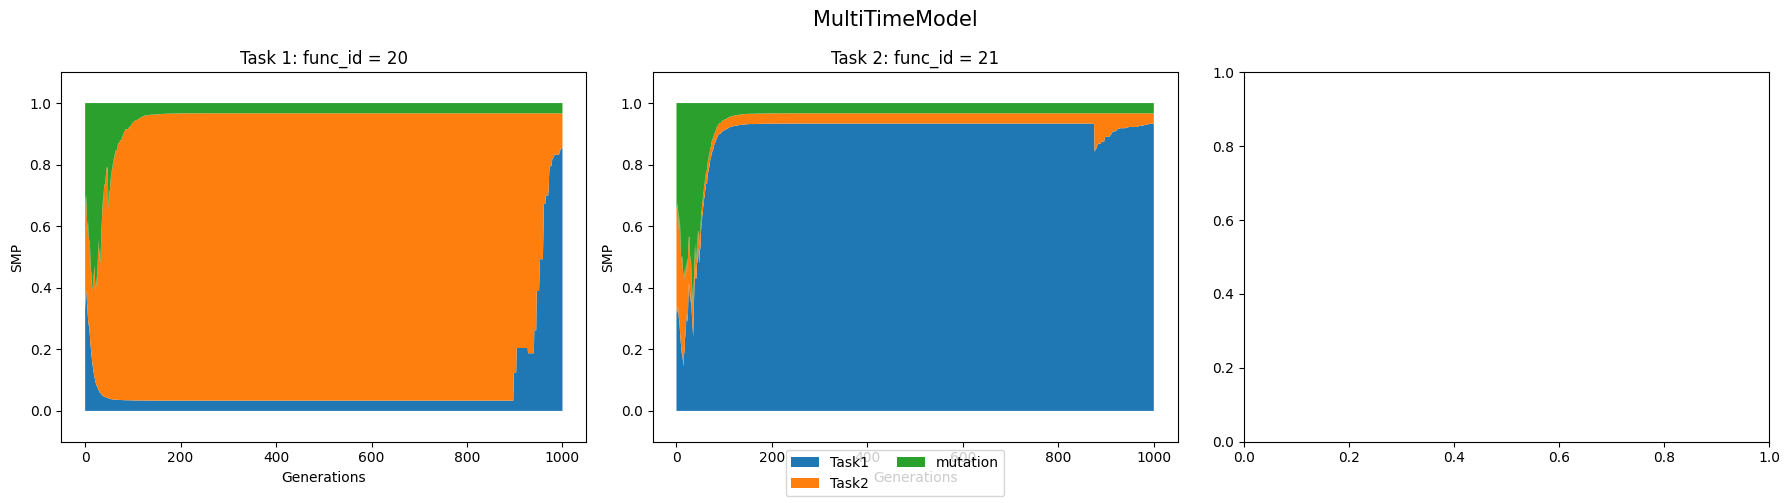

In [5]:
SMP_v2 = loadModel('./RESULTS/result/WCCI22_complex/SMP_v2/3.mso', ls_tasks= t)
SMP_v2.render_smp()

In [6]:
compare = CompareResultBenchmark(
    path_folder="./RESULTS/result/WCCI22_complex", 
    ls_benchmark= ls_benchmark
)
compare.load_folder()

(0 : LSA_COMPLEX)
(1 : LSA_21)
(2 : MFEA_COMPLEX)
(3 : MFEA1_COMPLEX)
(4 : SMP_COMPLEX_FINAL_CEC10)
(5 : SMP_v2)
(0 : LSA_COMPLEX)
(1 : LSA_21)
(2 : MFEA_COMPLEX)
(3 : MFEA1_COMPLEX)
(4 : SMP_COMPLEX_FINAL_CEC10)
(5 : SMP_v2)


In [7]:
compare.summarizing_compare_result(idx_main_algo= 5)

['LSA_COMPLEX', 'LSA_21', 'MFEA_COMPLEX', 'MFEA1_COMPLEX', 'SMP_COMPLEX_FINAL_CEC10', 'SMP_v2']


Better  Equal  Worse
SMP_v2 vs LSA_COMPLEX                  19      0      1
SMP_v2 vs LSA_21                       15      0      5
SMP_v2 vs MFEA_COMPLEX                 20      0      0
SMP_v2 vs MFEA1_COMPLEX                20      0      0
SMP_v2 vs SMP_COMPLEX_FINAL_CEC10      20      0      0

In [8]:
compare.show_compare_detail(idx_main_algo=0)


Benchmark:  1
               LSA_COMPLEX             LSA_21       MFEA_COMPLEX      MFEA1_COMPLEX SMP_COMPLEX_FINAL_CEC10                SMP_v2
Tasks1   612.7801631385278  608.0086430666668  641.2352856497579   608.908779636078       621.3871000886592  (+)603.6083358798143
Tasks2   621.3176276249004  607.8913740333334  641.3703910199642  608.9714738198566        621.362117720952  (+)602.2163330010533
Compare                0/2                0/2                0/2                0/2                     0/2                   2/2

Benchmark:  2
               LSA_COMPLEX             LSA_21       MFEA_COMPLEX      MFEA1_COMPLEX SMP_COMPLEX_FINAL_CEC10                SMP_v2
Tasks1   700.0000000010339        700.0025424   700.002784505369  700.0063009450764       700.0010681802964  (+)700.0000000000016
Tasks2   700.0073960406381  700.0032844333333  700.0012369534385  700.0058490107581       700.0000000003308  (+)700.0000000000008
Compare                0/2                0/2                

##### cec17

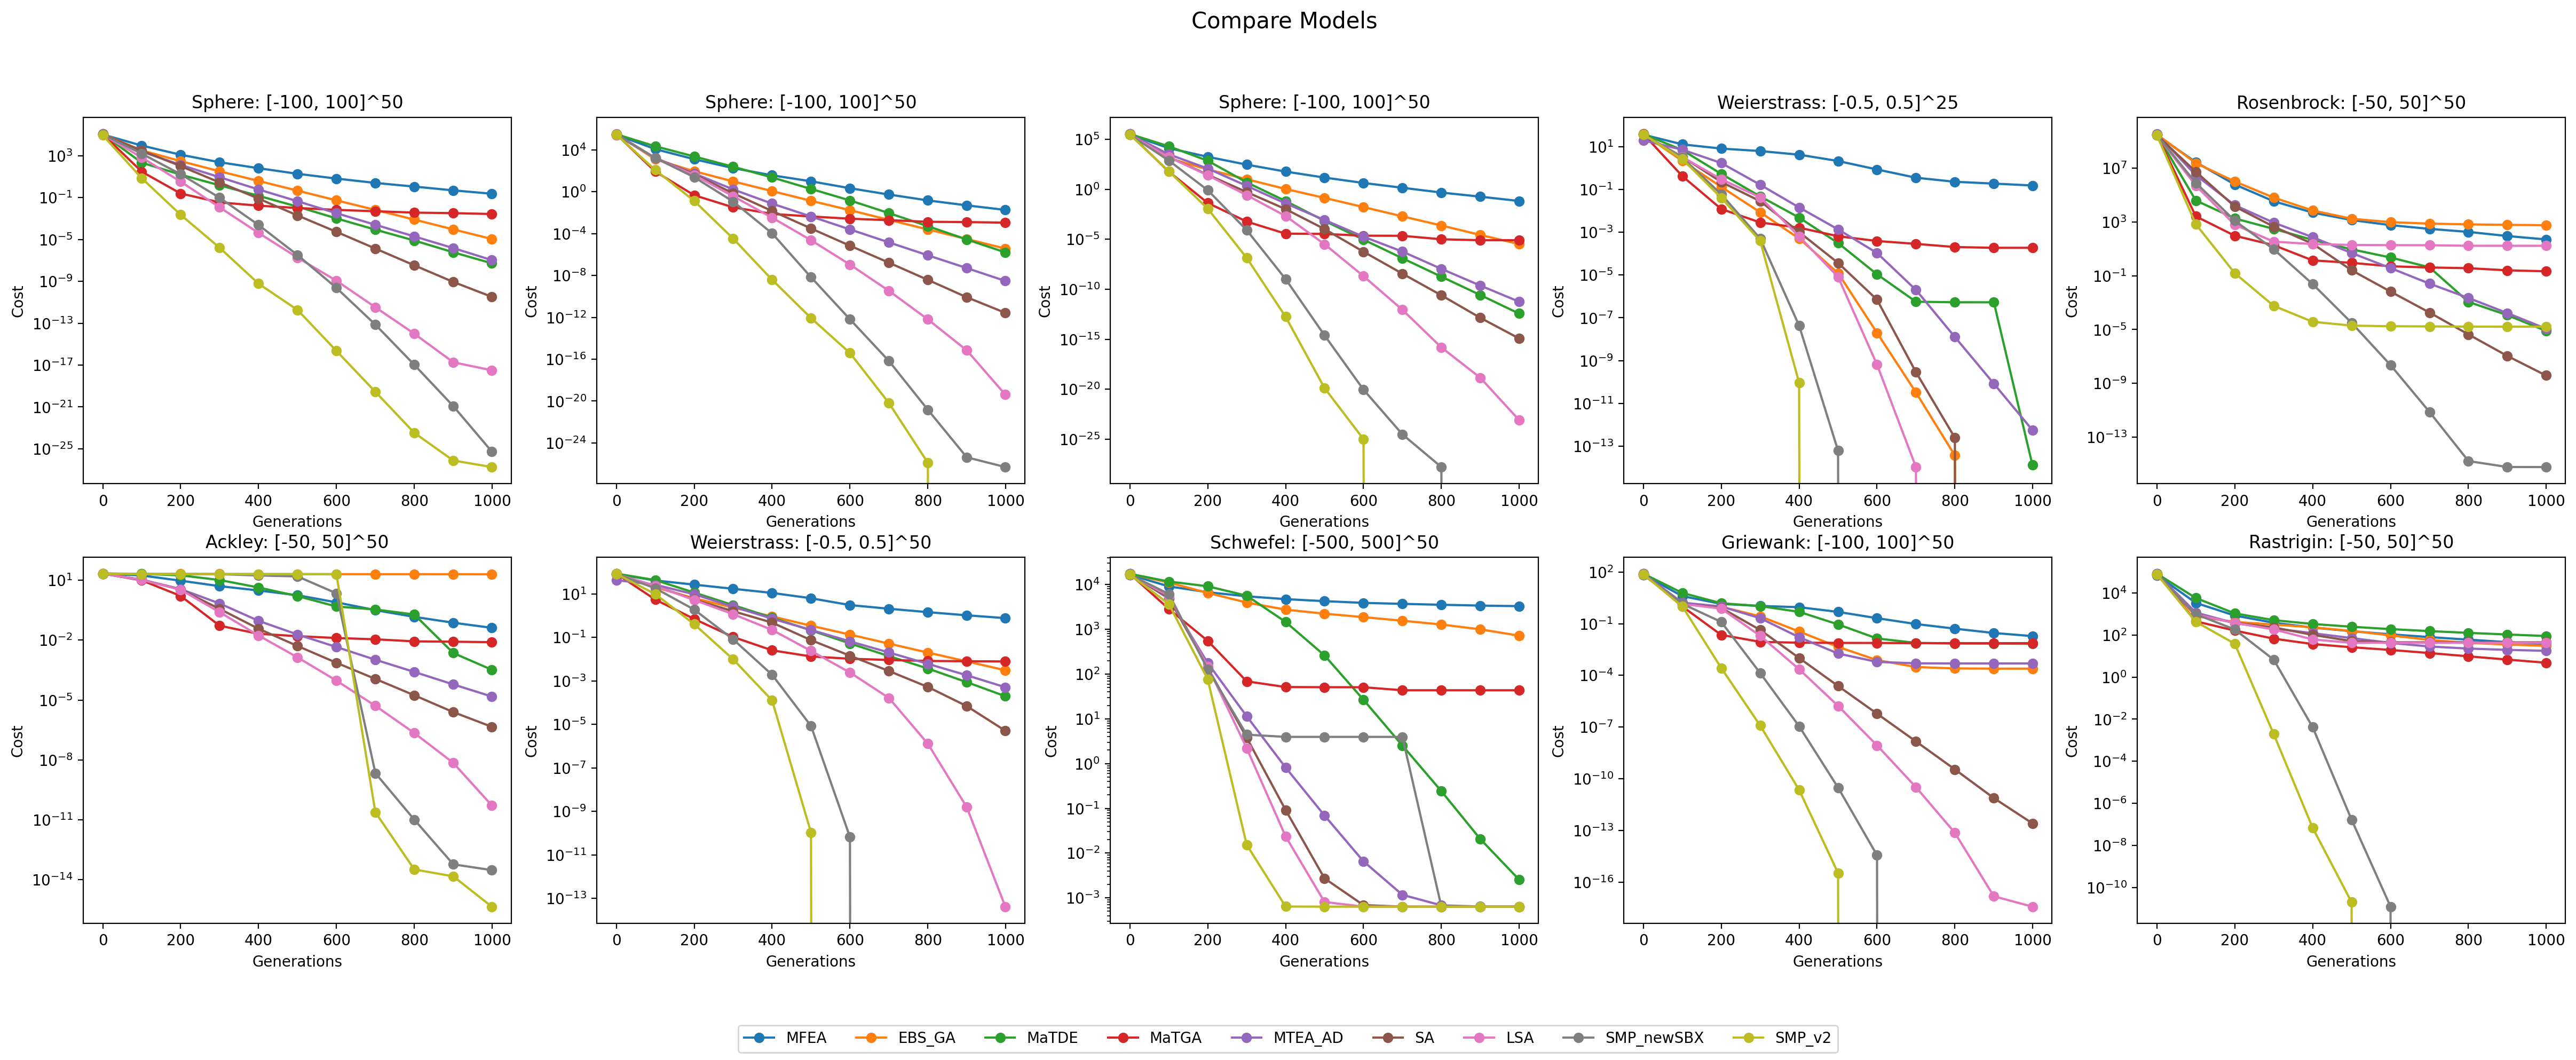

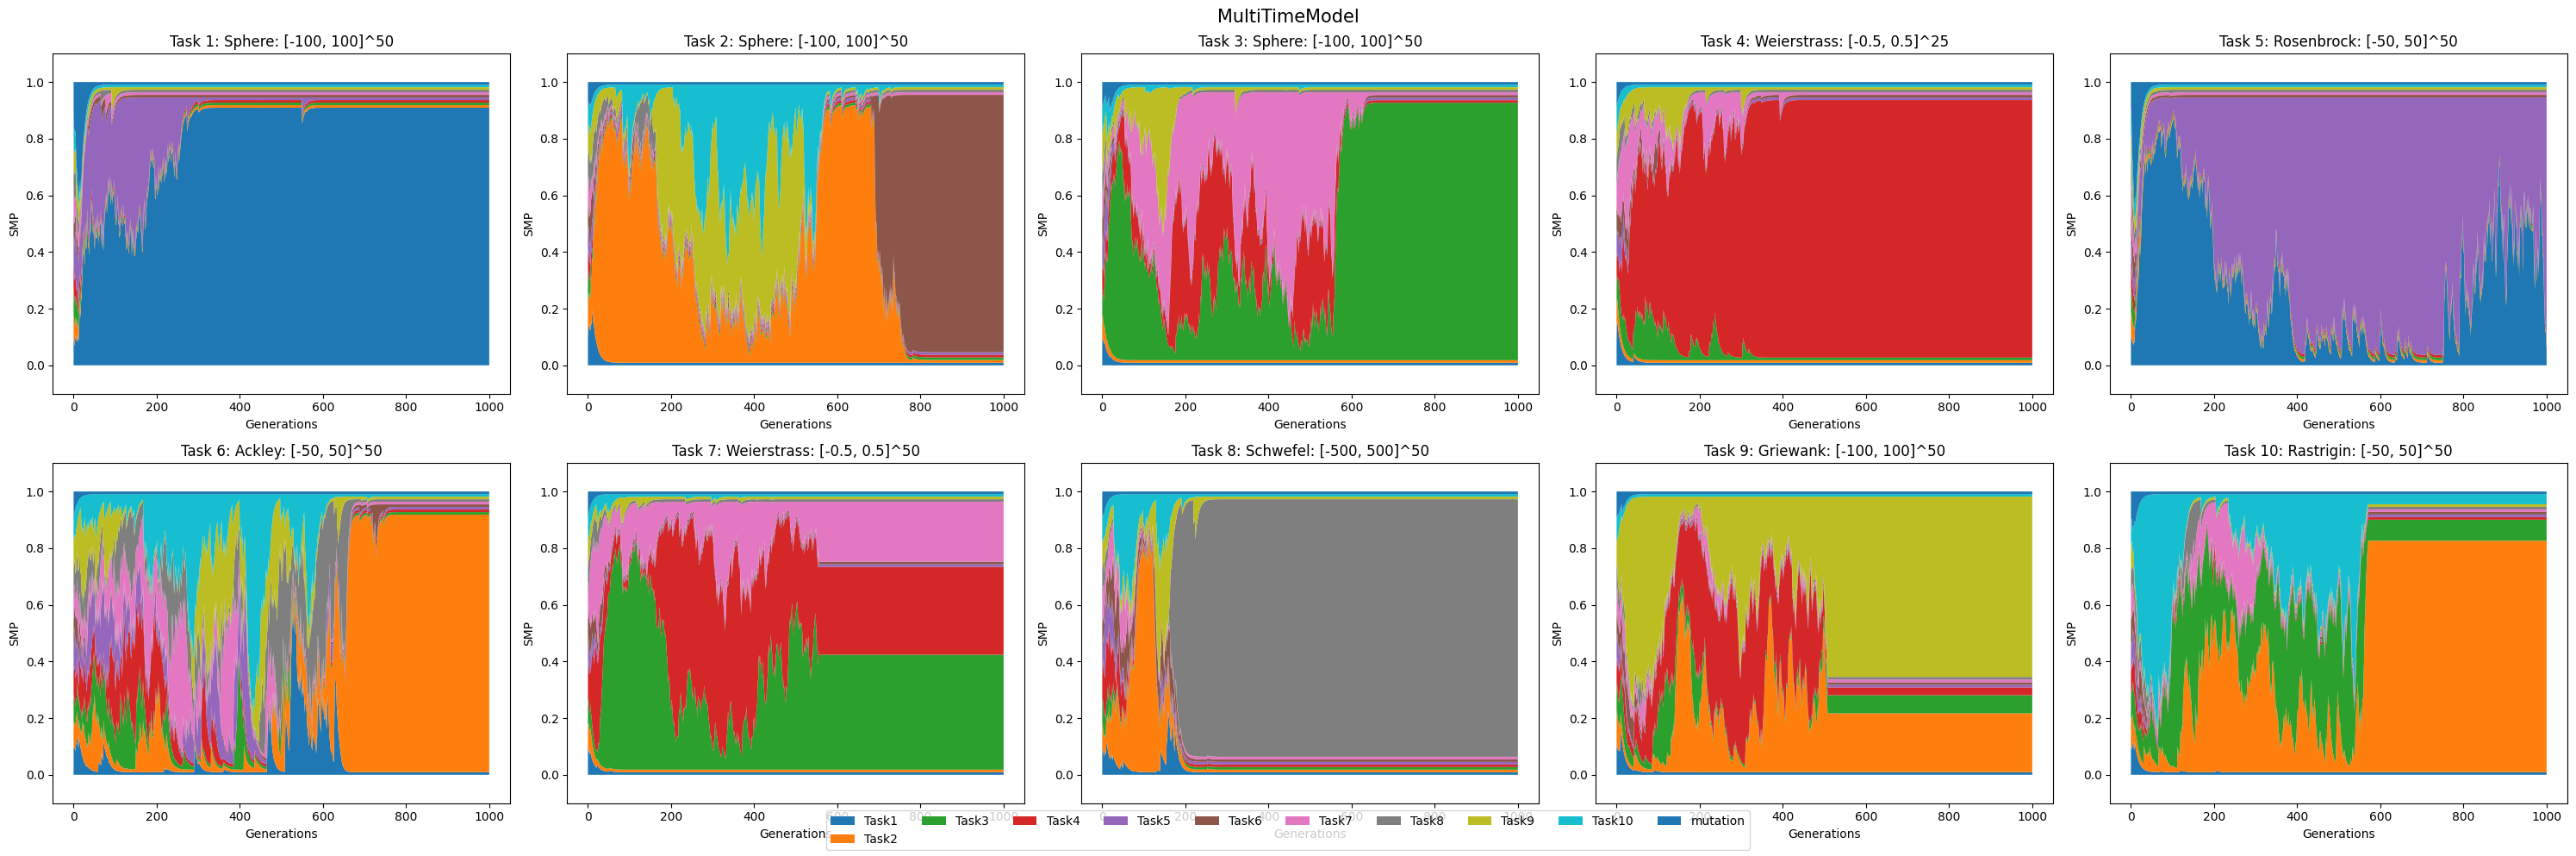

In [4]:
t, ic = CEC17_benchmark.get_10tasks_benchmark()

MFEA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MFEA_cec17.mso', ls_tasks= t)
EBS_GA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/EBS_GA_cec17.mso', ls_tasks= t)
MaTDE_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTDE_cec17.mso', ls_tasks= t)
MaTGA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTGA_cec17.mso', ls_tasks= t)
MTEA_AD_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MTEA_AD_cec17.mso', ls_tasks= t)
SA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/SA_cec17.mso', ls_tasks= t)
LSA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/LSA_cec17.mso', ls_tasks= t)
SMP_newSBX = loadModel('./RESULTS/__static__/CEC17_10tasks/SMP_NEWSBX.mso', ls_tasks= t)
SMP_v2 = loadModel('./RESULTS/result/CEC17/SMP_v2/cec17.mso', ls_tasks= t)

compare = CompareModel(
    models = [MFEA_model, EBS_GA_model, MaTDE_model, MaTGA_model, MTEA_AD_model, SA_model, LSA_model, SMP_newSBX, SMP_v2],
    label= [...] * 7 + ['SMP_newSBX', 'SMP_v2'],
)
compare.render(    
    shape = (2, 5),
    min_cost= 0,
    step= 100,
    yscale= 'log'
)

# SMP_newSBX.render_smp(shape= (3, 5), step = 1)
SMP_v2.render_smp(shape= (2, 5), step = 1)
print()

30 times

In [ ]:
# smpModel = MultiTimeModel(model= SMP_MFEA)
# smpModel.compile(
#     tasks= cec17_10tasks,
#     crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
#     # mutation= NoMutation(),
#     mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
#     selection= ElitismSelection(random_percent= 0.),
# )
# smpModel.fit(
#     nb_generations= 10, nb_inds_each_task= 100, nb_inds_min= 20,
#     lr = 1.5, p_const_intra= 0.3, p_mutate= 0.,
#     nb_epochs_stop= 50, 
#     evaluate_initial_skillFactor= True
# )
# smpModel.run(
#     nb_run= 30,
#     save_path= './RESULTS/smpMFEA_cec17.mso'
# )

In [ ]:
# smpModel.render_history(shape = (2, 5), yscale= 'log')
# print()

In [ ]:
# smpModel.render_smp(step = 1, get_host= True)
# print()

##### GECCO20

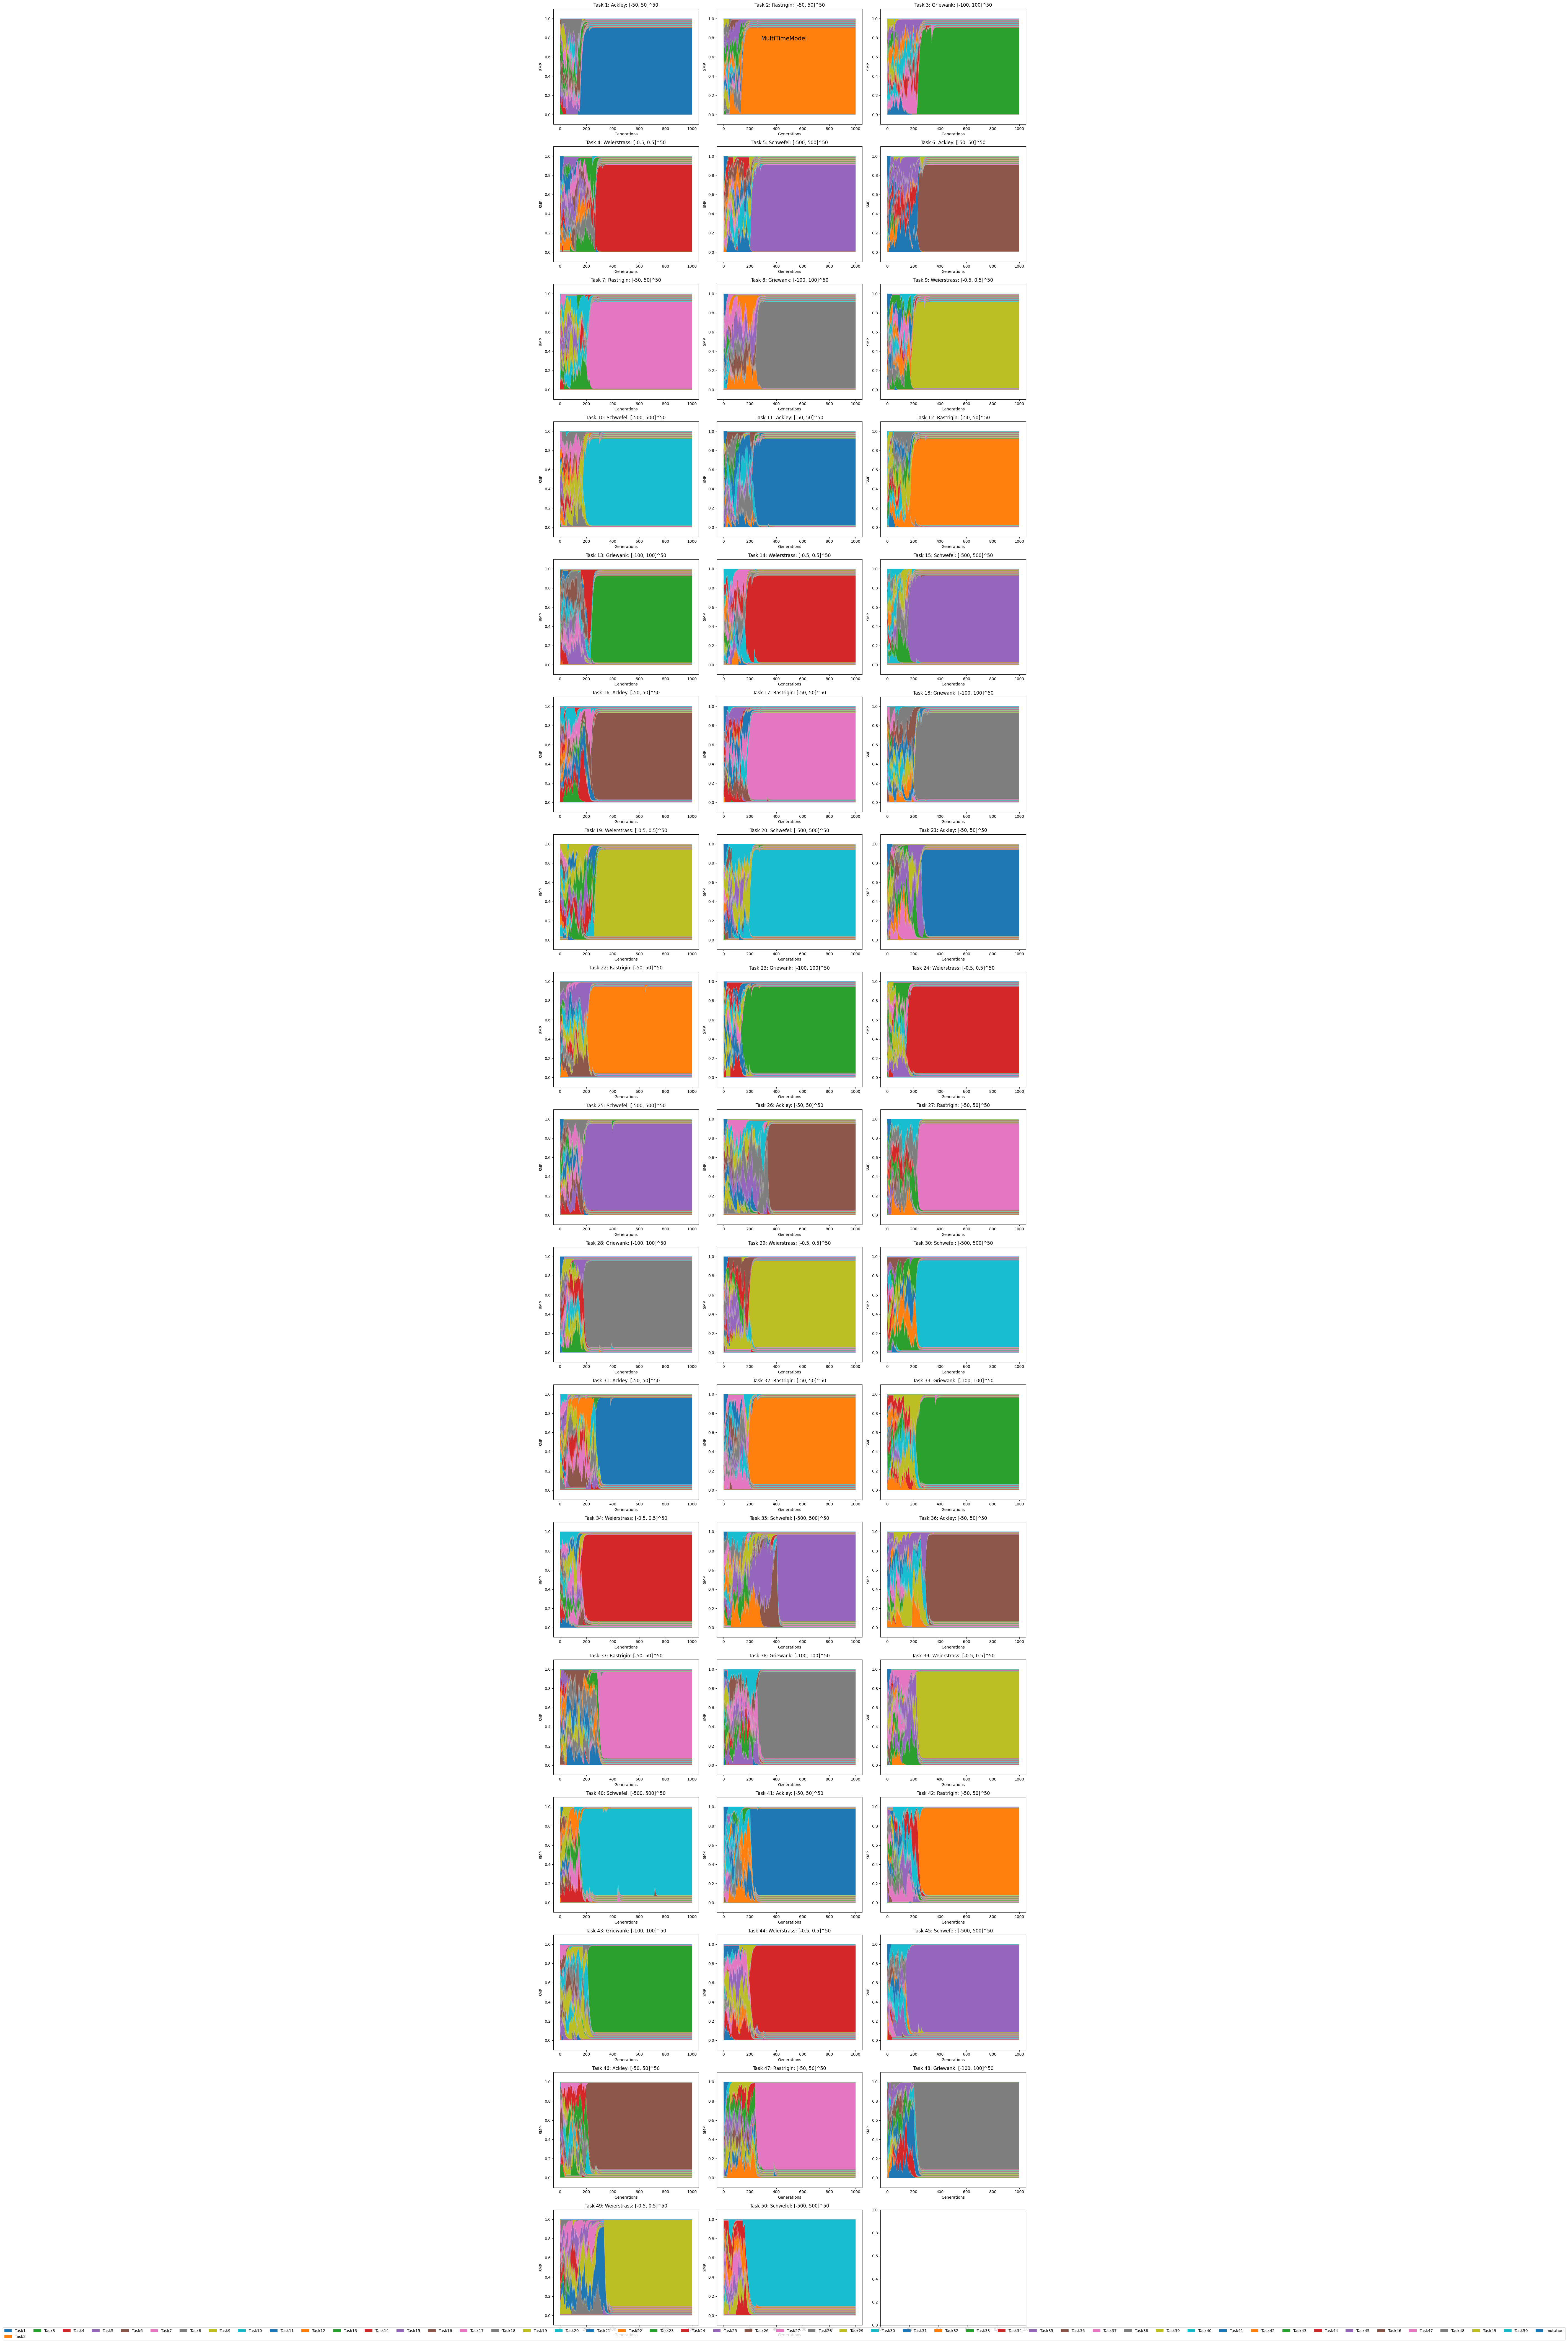

In [4]:
SMP_v2 = loadModel('./RESULTS/result/GECCO20/SMP_v2/3.mso', ls_tasks= t)
SMP_v2.render_smp()

In [5]:
# gecco20
ls_benchmark = []
ls_IndClass = []
name_benchmark = []
path = './RESULTS/result/GECCO20/SMP_v2/'

for i in range(1, 11, 1):
    t, ic = WCCI22_benchmark.get_50tasks_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)

In [6]:
compare = CompareResultBenchmark(
    path_folder="./RESULTS/result/GECCO20/", 
    ls_benchmark= ls_benchmark
)
compare.load_folder()

(0 : SBS_GA_poly)
(1 : SBS_GA)
(2 : MFEA)
(3 : LSA_2021)
(4 : EBS_GA)
(5 : SMP_v2)
(6 : SMP_15_5)
(0 : SBS_GA_poly)
(1 : SBS_GA)
(2 : MFEA)
(3 : LSA_2021)
(4 : EBS_GA)
(5 : SMP_v2)
(6 : SMP_15_5)


In [9]:
compare.summarizing_compare_result(idx_main_algo= 5)

['SBS_GA_poly', 'SBS_GA', 'MFEA', 'LSA_2021', 'EBS_GA', 'SMP_v2', 'SMP_15_5']


Better  Equal  Worse
SMP_v2 vs SBS_GA_poly     373      0    127
SMP_v2 vs SBS_GA          381      0    119
SMP_v2 vs MFEA            478      0     22
SMP_v2 vs LSA_2021         90      0    410
SMP_v2 vs EBS_GA          385      0    115
SMP_v2 vs SMP_15_5        220      4    276

In [8]:
compare.show_compare_detail(idx_main_algo=3)

Benchmark:  1
        LSA_2021                  SBS_GA                MFEA             SBS_GA_poly                  EBS_GA                  SMP_v2                SMP_15_5
Tasks1    (+)0.0  1.8984391916298324e-05  16.288013618479884   5.882689301802719e-17  1.0430804487308234e-05  2.0683645008368233e-27    2.83632059206948e-27
Tasks2    (+)0.0  1.9106014199924534e-05    16.5676385516495   4.843200798357875e-17  1.3539504844404152e-05   2.443518079892715e-27  2.6959535695634384e-27
Tasks3    (+)0.0  1.7304267667595325e-05  16.216383616767548    6.10017625456379e-17  1.4127291329255025e-05   2.458634620519093e-27   3.340359245426589e-27
Tasks4    (+)0.0  1.6958124642338686e-05   17.67265189767982   5.276877406922684e-17  1.2778358360218192e-05  2.0381669785703016e-27  2.6455898755904814e-27
Tasks5    (+)0.0   1.657578649849271e-05   16.73864776800901   6.108846729966608e-17  1.2348267144463127e-05   1.543643635634058e-27  1.5767757936533406e-27
Tasks6    (+)0.0   2.005552998446108e-05   1